<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Building_an_AI_based_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import matplotlib.pyplot as plt
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [3]:
df_super_store.sample(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4973,655,CA-2016-137239,22/08/2016,28/08/2016,Standard Class,CR-12730,Craig Reiter,Consumer,United States,Columbus,...,43229,East,OFF-AP-10002439,Office Supplies,Appliances,Tripp Lite Isotel 8 Ultra 8 Outlet Metal Surge,113.552,2,0.2,8.5164
5933,322,CA-2014-164973,11/04/2014,11/09/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,10024,East,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",43.570,1,0.0,13.071
9776,3733,CA-2015-109575,18/09/2015,23/09/2015,Standard Class,KH-16630,Ken Heidel,Corporate,United States,Clinton,...,20735,East,TEC-PH-10000895,Technology,Phones,Polycom VVX 310 VoIP phone,1259.930,7,0.0,327.5818
1090,8584,CA-2014-130673,20/05/2014,22/05/2014,Second Class,MC-17590,Matt Collister,Corporate,United States,San Marcos,...,78666,Central,OFF-ST-10000636,Office Supplies,Storage,Rogers Profile Extra Capacity Storage Tub,66.960,5,0.2,-13.392
6095,2914,CA-2014-113929,16/06/2014,21/06/2014,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Hempstead,...,11550,East,OFF-BI-10002852,Office Supplies,Binders,Ibico Standard Transparent Covers,39.552,3,0.2,14.3376


In [4]:
df_super_store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Summary**

The dataset appears to contain information related to orders, with various

1.   attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   the data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   from the first impression the significant feature is `'Ship Mode', 'Segment', 'Quantity', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics:

Let's try to explor the data

In [5]:
df_super_store.describe(include='all')



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9993,9992,9991,9990,9994,9991,9991,9990,9992,...,9991,9991,9992,9992,9990,9991,9993.000000,9989,9991.000000,9983
unique,NaN,5008,1238,1333,4,793,794,4,3,531,...,633,8,1862,4,17,1850,NaN,19,NaN,7281
top,NaN,CA-2017-100111,09/05/2016,16/12/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,3,NaN,0
freq,NaN,14,38,35,5965,37,37,5189,9985,915,...,263,3202,19,6024,1522,48,NaN,2407,NaN,65
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,229.863780,NaN,0.156180,NaN
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,623.276019,NaN,0.206399,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,NaN,0.000000,NaN
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,NaN,0.000000,NaN
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.480000,NaN,0.200000,NaN
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,NaN,0.200000,NaN


In [6]:
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [7]:
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

#2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.
I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected


In [8]:
df_super_store.dropna(inplace=True)

In [9]:
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [11]:
del df_super_store['Row ID']

5

In [12]:
df_super_store.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity          object
Discount         float64
Profit            object
dtype: object

##discover the values that expected to be number like Quantity, Sales, Profit

### Convert sales to float from object type as it look like numeric

### Convert Quantity to numberic

In [13]:
df_super_store['Quantity'].unique()


array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [14]:
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


### Convert Profit to numberic

In [15]:
df_super_store['Profit'].unique()


array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [16]:
df_super_store.loc[~df_super_store['Profit'].str.match(r'^-?[0-9.]+$', na=False), 'Profit']


5    "-2639.9912"
Name: Profit, dtype: object

In [17]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


# Check the data types after conversion

In [18]:
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


# check the NA values and clean it

In [19]:
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#2.6 Correlation: Describe features that are related and the nature of that relationship.

In [21]:
df_super_store.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
556,CA-2015-161263,16/04/2015,21/04/2015,Standard Class,TS-21160,Theresa Swint,Corporate,United States,Toledo,Ohio,43615,East,OFF-BI-10004330,Office Supplies,Binders,"GBC Velobind Prepunched Cover Sets, Regency Se...",55.470,5,0.7,-46.2250
1447,CA-2014-152345,29/12/2014,01/03/2015,Second Class,ST-20530,Shui Tom,Consumer,United States,Albuquerque,New Mexico,87105,West,TEC-PH-10004897,Technology,Phones,Mediabridge Sport Armband iPhone 5s,23.976,3,0.2,-5.6943
7824,CA-2014-163412,20/12/2014,23/12/2014,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,New York,10035,East,FUR-CH-10004875,Furniture,Chairs,Harbour Creations 67200 Series Stacking Chairs,192.186,3,0.1,36.3018
745,CA-2017-119284,15/06/2017,20/06/2017,Standard Class,TS-21205,Thomas Seio,Corporate,United States,Nashville,Tennessee,37211,South,FUR-TA-10004152,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",120.960,2,0.4,-28.2240
5275,CA-2017-130631,29/12/2017,01/02/2018,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,98026,West,OFF-FA-10000089,Office Supplies,Fasteners,Acco Glide Clips,19.600,5,0.0,9.6040


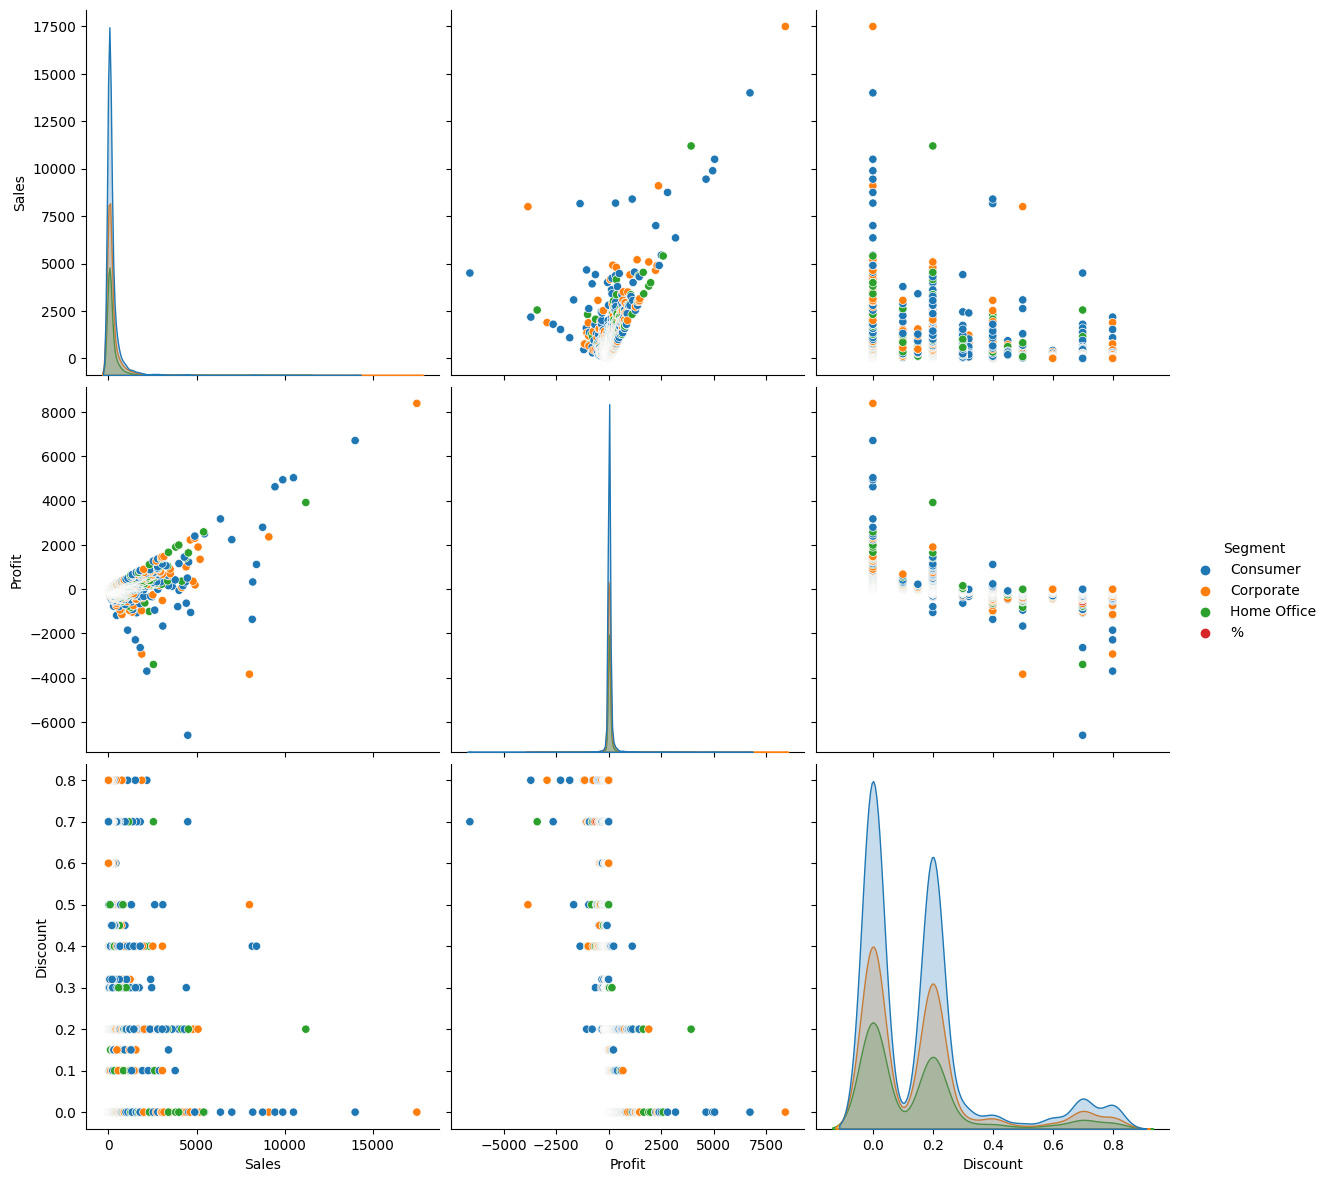

In [24]:
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit', 'Discount'])

In [25]:
correlation_matrix = df_super_store.corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.207974 -0.040708  0.566015
Quantity  0.207974  1.000000  0.006379  0.073891
Discount -0.040708  0.006379  1.000000 -0.211637
Profit    0.566015  0.073891 -0.211637  1.000000


<ipython-input-25-aa93160ee947>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_super_store.corr()


<Axes: >

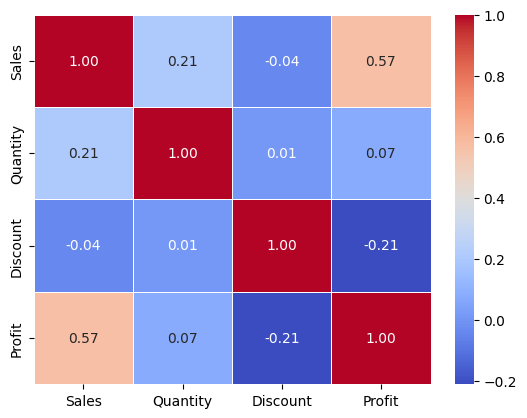

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
